## Import

In [35]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from pydicom.data import get_testdata_files

In [43]:
    print('**** Start Extracts: Loop through SubjectID selection')
    path = 'P:\Desktop\LIH_2021\TransRad Projects & users applications\Venkat - Segmentation in Noise\Preclinical data\Data_Stanford\\MRD(' \
           'sub-subfolders)\\1400\\19352\\'
    file_mag = path + '19352_Mag_0005.dcm'
    file_phase = path + '19352_Phase_0005.dcm'
    print(file_mag)

**** Start Extracts: Loop through SubjectID selection
P:\Desktop\LIH_2021\TransRad Projects & users applications\Venkat - Segmentation in Noise\Preclinical data\Data_Stanford\MRD(sub-subfolders)\1400\19352\19352_Mag_0005.dcm


In [53]:
dicom_image_mag = pydicom.dcmread(file_mag)
dicom_image_phase = pydicom.dcmread(file_phase)


In [45]:
kspace = dicom_image_mag.pixel_array*np.exp(dicom_image_phase.pixel_array*1j)

In [46]:
im = np.fft.ifft(kspace, axis=1)
im = np.fft.ifft(im, axis=0)
im = np.fft.ifftshift(im)
im = np.abs(im)

<ipython-input-52-1cb49b3c5e2c>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(abs(np.log(kspace)), cmap='gray')
<ipython-input-52-1cb49b3c5e2c>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(dicom_image_mag.pixel_array), cmap='gray')
<ipython-input-52-1cb49b3c5e2c>:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(dicom_image_phase.pixel_array), cmap='gray')


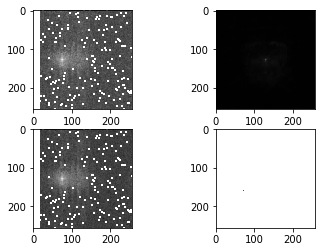

In [52]:

plt.subplot(221)
plt.imshow(abs(np.log(kspace)), cmap='gray') 
plt.subplot(222)
plt.imshow(im, cmap='gray') 
plt.subplot(223)
plt.imshow(np.log(dicom_image_mag.pixel_array), cmap='gray') 
plt.subplot(224)
plt.imshow(np.log(dicom_image_phase.pixel_array), cmap='gray') 